<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/DUDL_overfitting_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split

## Create the data and the model

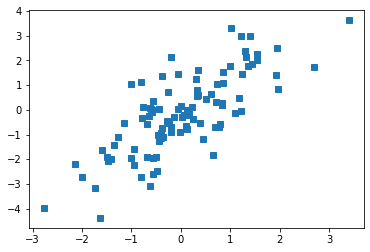

In [2]:
N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

# and plot
plt.plot(x, y, 's')
plt.show()

In [3]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1)     # output layer
)

In [4]:
# model meta-parameters
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

# Select data for training

In [5]:
# select training data (not the hand-coded N!)
trainidx = np.random.choice(range(N), 80, replace=False) # random indices
trainBool = np.zeros(N, dtype=bool)
trainBool[trainidx] = True 
# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


## Training the model

In [6]:
numepochs = 500
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x[trainBool])

    # compute loss
    loss = lossfun(yHat, y[trainBool])

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [7]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest - y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final Train loss: {loss.detach():.2f}')
print(f'Final Test loss: {testloss.detach():.2f}')

Final Train loss: 0.98
Final Test loss: 1.36


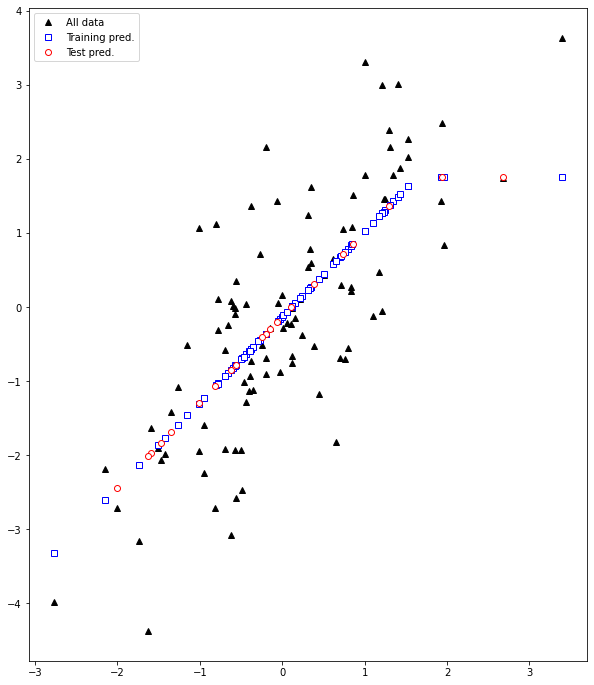

In [9]:
## plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()
plt.figure(figsize=(10, 12))
# now plot
plt.plot(x, y, 'k^', label='All data')
plt.plot(x[trainBool], predYtrain, 'bs', markerfacecolor='w', label='Training pred.')
plt.plot(x[~trainBool], predYtest.detach(), 'ro', markerfacecolor='w', label='Test pred.')
plt.legend()
plt.show()

